Enter the path to the CSV file (example.csv):  S:\AI Lab\numeric_edge.csv



DFS Traversal Order (Recursive): [0, 1, 4, 5, 6, 2, 7, 9, 3, 8]


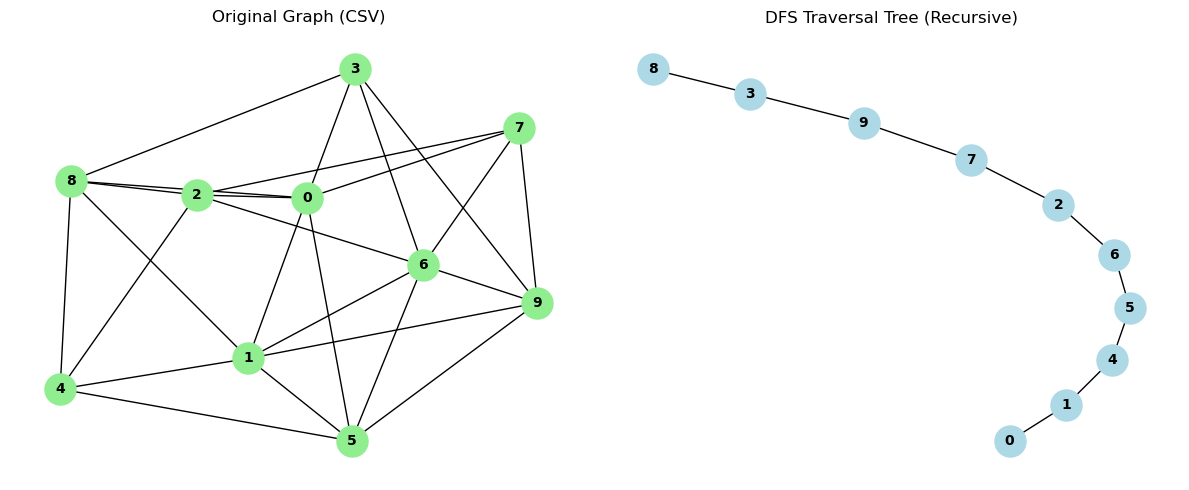

In [1]:
# Part 1: Recursive DFS from CSV
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def dfs_recursive(graph, node, visited=None, torder=None, edges=None):
    if visited is None:
        visited = set()
    if torder is None:
        torder = []
    if edges is None:
        edges = []

    visited.add(node)
    torder.append(node)

    for neighbor in graph.neighbors(node):
        if neighbor not in visited:
            edges.append((node, neighbor))
            dfs_recursive(graph, neighbor, visited, torder, edges)

    return torder, edges

# --- Read Graph from CSV ---
file_path = input("Enter the path to the CSV file (example.csv): ")
data = pd.read_csv(file_path)

# Create graph
graph = nx.from_pandas_edgelist(data, 'source', 'target', create_using=nx.Graph())

# Perform Recursive DFS
startnode = list(graph.nodes())[0]  # first node
torder_recursive, edges_recursive = dfs_recursive(graph, startnode)

print("\nDFS Traversal Order (Recursive):", torder_recursive)

# --- Plot Graphs ---
plt.figure(figsize=(12, 5))

# Original graph
plt.subplot(121)
pos1 = nx.spring_layout(graph)
nx.draw(graph, pos1, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold')
plt.title("Original Graph (CSV)")

# DFS Traversal Tree (Recursive)
plt.subplot(122)
tree_recursive = nx.Graph()
tree_recursive.add_edges_from(edges_recursive)
pos2 = nx.spring_layout(tree_recursive)
nx.draw(tree_recursive, pos2, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("DFS Traversal Tree (Recursive)")

plt.tight_layout()
plt.show()
